In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
# Load the dataset
data = pd.read_excel("HR_Analytic.xlsx")

# Preview dataset
print(data.head())
print(data.info())


   EmpID  Age  AgeGroup  Attrition  BusinessTravel  DailyRate  Department  \
0    297   18         0          1               1        230           1   
1    302   18         0          0               1        812           2   
2    458   18         0          1               2       1306           2   
3    728   18         0          0               0        287           1   
4    829   18         0          1               0        247           1   

   DistanceFromHome  EducationField  EmployeeCount  ...  \
0                 3               0              1  ...   
1                10               2              1  ...   
2                 5               1              1  ...   
3                 5               0              1  ...   
4                 8               2              1  ...   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                         3             80                 0   
1                         1             80            

In [ ]:
# Check for missing values
print(data.isnull().sum())


EmpID                        0
Age                          0
AgeGroup                     0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
EducationField               0
EmployeeCount                0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
SalarySlab                   0
MonthlyRate                  0
NumCompaniesWorked           0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtC

In [ ]:
data = data.dropna(subset=['YearsWithCurrManager'])

In [ ]:
print(data.isnull().sum())

EmpID                       0
Age                         0
AgeGroup                    0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
SalarySlab                  0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCur

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

In [ ]:
# Separate features and target
X = data.drop('Attrition', axis=1)
y = data['Attrition']

In [ ]:
# Data Preprocessing
# Scale numeric features
numeric_columns = X.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])
# Model: Logistic Regression
log_reg = LogisticRegression(random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy: 84.51%
Testing Accuracy: 81.63%
Confusion Matrix for Testing Data:
 [[230   0]
 [ 52   1]]
Confusion Matrix for Training Data:
 [[951   3]
 [172   4]]


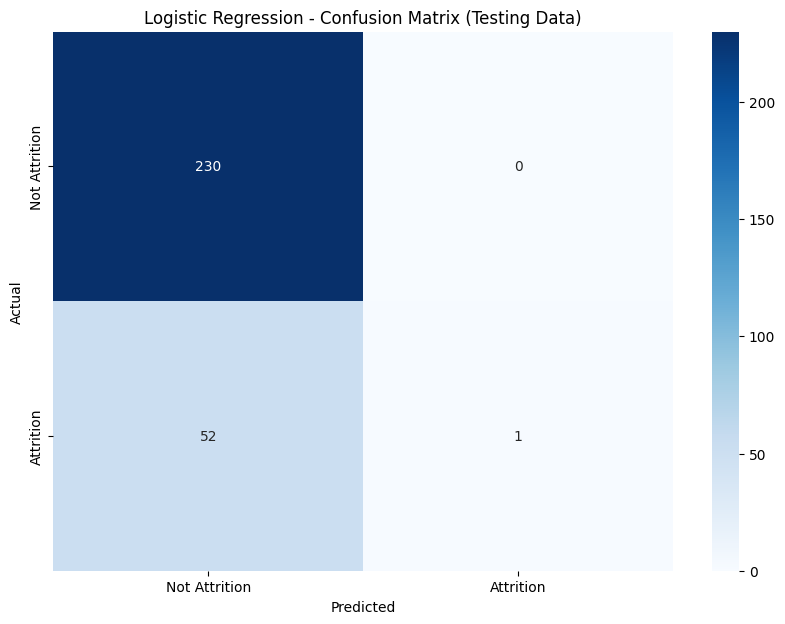

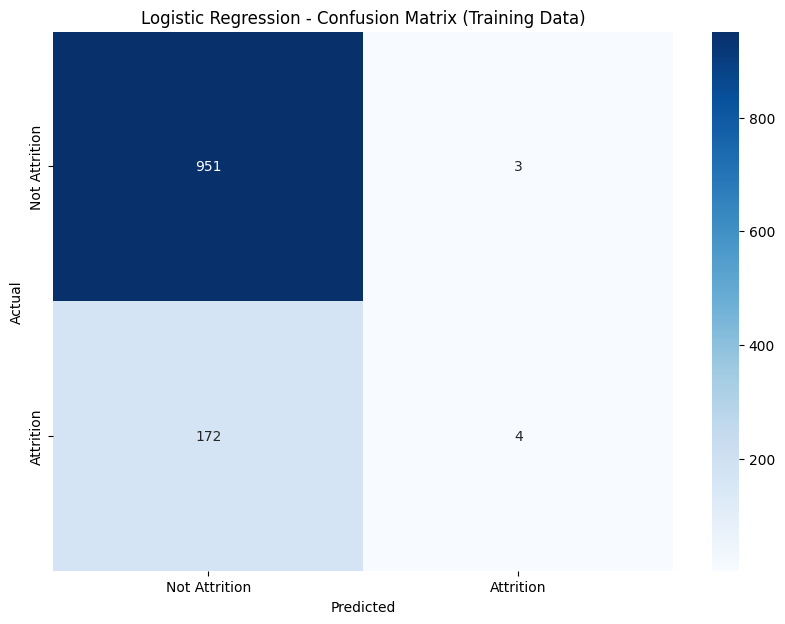

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is the dataframe and 'Attrition' is the target variable
X = data.drop('Attrition', axis=1)  # Features (independent variables)
y = data['Attrition']               # Target variable (dependent)

# Split the dataset into training and testing sets (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model: Logistic Regression
log_reg = LogisticRegression(random_state=42)

# Train the model on the training data
log_reg.fit(X_train, y_train)

# Predictions on the testing data
y_pred_log_reg_test = log_reg.predict(X_test)

# Predictions on the training data
y_pred_log_reg_train = log_reg.predict(X_train)

# Model Evaluation
# Calculate Training Accuracy
train_accuracy = accuracy_score(y_train, y_pred_log_reg_train)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Calculate Testing Accuracy
test_accuracy = accuracy_score(y_test, y_pred_log_reg_test)
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

# Confusion Matrix for Testing Data
conf_matrix_test = confusion_matrix(y_test, y_pred_log_reg_test)

# Confusion Matrix for Training Data
conf_matrix_train = confusion_matrix(y_train, y_pred_log_reg_train)

# Display Confusion Matrices
print("Confusion Matrix for Testing Data:\n", conf_matrix_test)
print("Confusion Matrix for Training Data:\n", conf_matrix_train)

# Visualize Confusion Matrix for Testing Data
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Attrition", "Attrition"], yticklabels=["Not Attrition", "Attrition"])
plt.title("Logistic Regression - Confusion Matrix (Testing Data)")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Visualize Confusion Matrix for Training Data
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_train, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Attrition", "Attrition"], yticklabels=["Not Attrition", "Attrition"])
plt.title("Logistic Regression - Confusion Matrix (Training Data)")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



Decision Tree - Training Accuracy: 100.00%
Decision Tree - Testing Accuracy: 74.91%
Confusion Matrix (Training):
 [[954   0]
 [  0 176]]
Confusion Matrix (Testing):
 [[195  35]
 [ 36  17]]


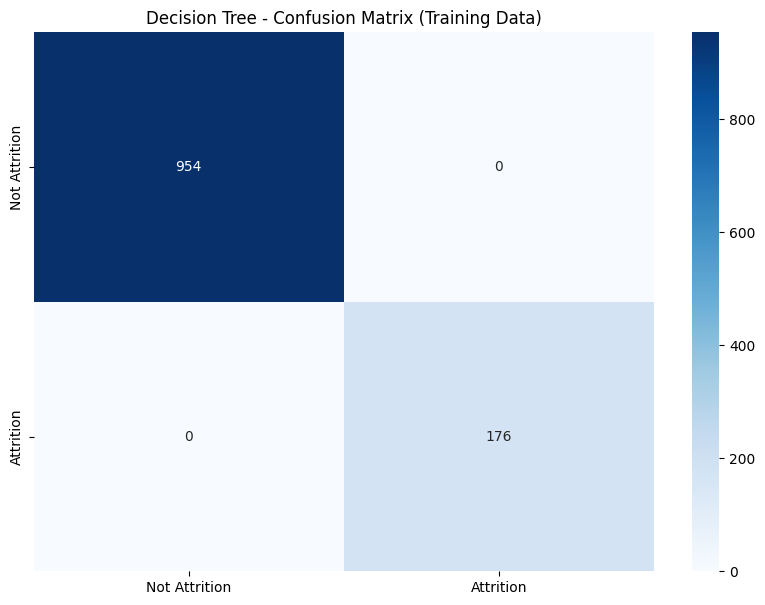

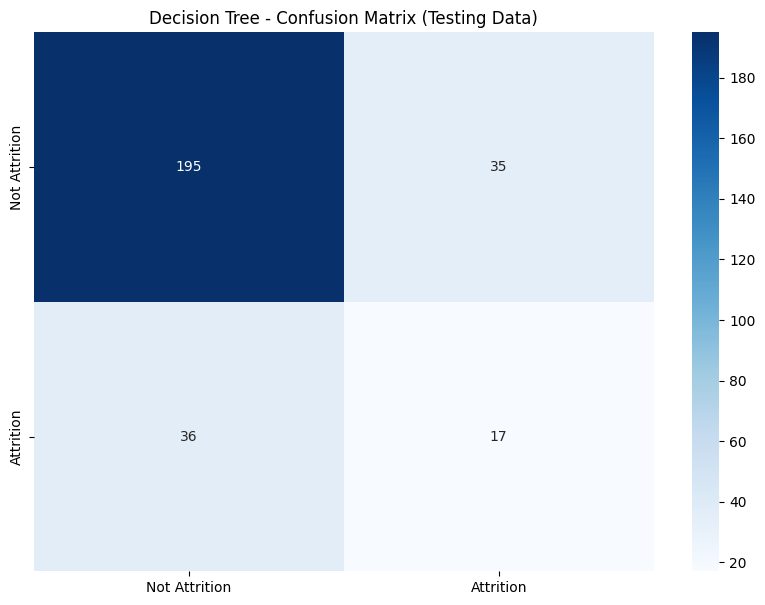

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Model: Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predictions on training and test data
y_train_pred_dt = dt_model.predict(X_train)
y_test_pred_dt = dt_model.predict(X_test)

# Accuracy
train_accuracy_dt = accuracy_score(y_train, y_train_pred_dt)
test_accuracy_dt = accuracy_score(y_test, y_test_pred_dt)

print(f"Decision Tree - Training Accuracy: {train_accuracy_dt * 100:.2f}%")
print(f"Decision Tree - Testing Accuracy: {test_accuracy_dt * 100:.2f}%")

# Confusion Matrices
conf_matrix_train_dt = confusion_matrix(y_train, y_train_pred_dt)
conf_matrix_test_dt = confusion_matrix(y_test, y_test_pred_dt)

# Display confusion matrices
print("Confusion Matrix (Training):\n", conf_matrix_train_dt)
print("Confusion Matrix (Testing):\n", conf_matrix_test_dt)

# Visualize Confusion Matrix for Training Data
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_train_dt, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Attrition", "Attrition"], yticklabels=["Not Attrition", "Attrition"])
plt.title("Decision Tree - Confusion Matrix (Training Data)")
plt.show()

# Visualize Confusion Matrix for Testing Data
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_test_dt, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Attrition", "Attrition"], yticklabels=["Not Attrition", "Attrition"])
plt.title("Decision Tree - Confusion Matrix (Testing Data)")
plt.show()


Random Forest - Training Accuracy: 100.00%
Random Forest - Testing Accuracy: 84.45%
Confusion Matrix (Training):
 [[954   0]
 [  0 176]]
Confusion Matrix (Testing):
 [[230   0]
 [ 44   9]]


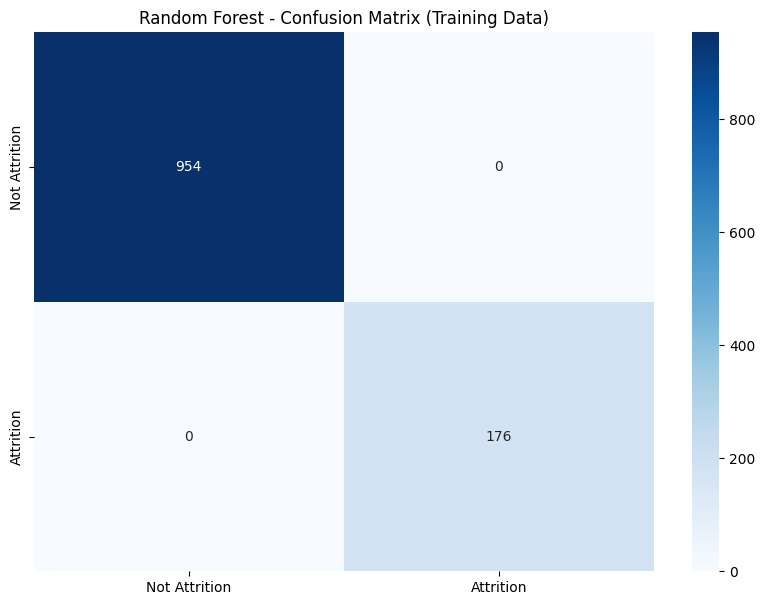

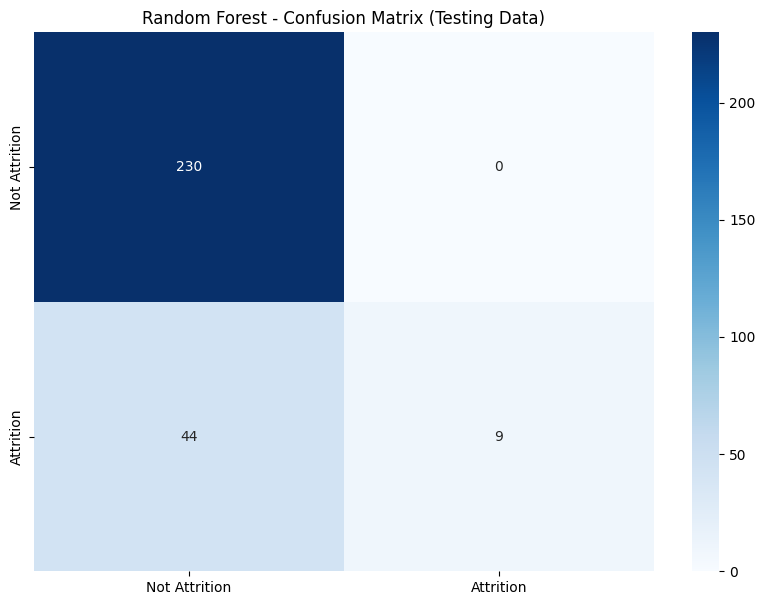

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Model: Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predictions on training and test data
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Accuracy
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

print(f"Random Forest - Training Accuracy: {train_accuracy_rf * 100:.2f}%")
print(f"Random Forest - Testing Accuracy: {test_accuracy_rf * 100:.2f}%")

# Confusion Matrices
conf_matrix_train_rf = confusion_matrix(y_train, y_train_pred_rf)
conf_matrix_test_rf = confusion_matrix(y_test, y_test_pred_rf)

# Display confusion matrices
print("Confusion Matrix (Training):\n", conf_matrix_train_rf)
print("Confusion Matrix (Testing):\n", conf_matrix_test_rf)

# Visualize Confusion Matrix for Training Data
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_train_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Attrition", "Attrition"], yticklabels=["Not Attrition", "Attrition"])
plt.title("Random Forest - Confusion Matrix (Training Data)")
plt.show()

# Visualize Confusion Matrix for Testing Data
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_test_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Attrition", "Attrition"], yticklabels=["Not Attrition", "Attrition"])
plt.title("Random Forest - Confusion Matrix (Testing Data)")
plt.show()


SVM - Training Accuracy: 84.42%
SVM - Testing Accuracy: 81.27%
Confusion Matrix (Training):
 [[954   0]
 [176   0]]
Confusion Matrix (Testing):
 [[230   0]
 [ 53   0]]


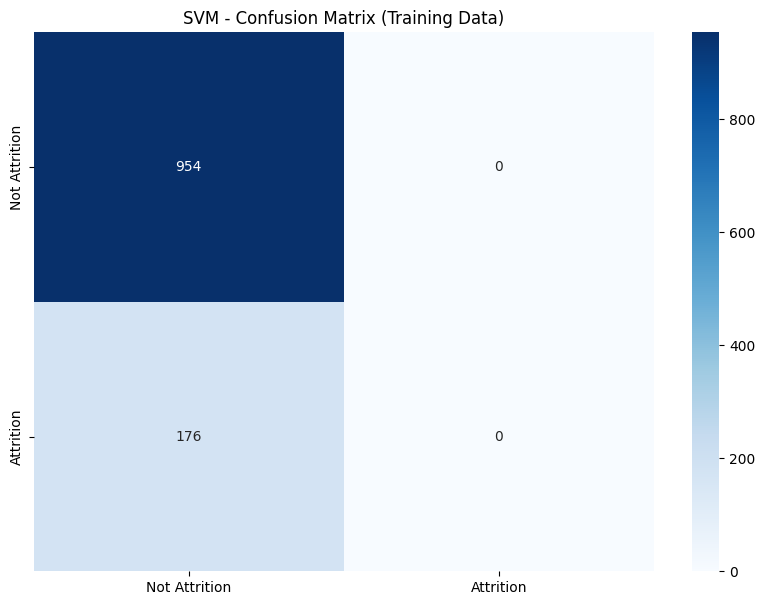

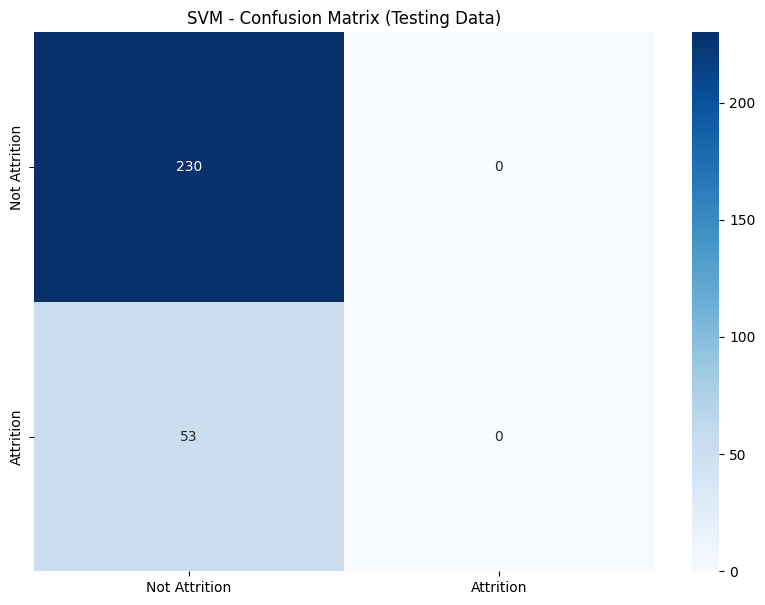

In [ ]:
from sklearn.svm import SVC

# Model: Support Vector Machine (SVM)
svm_model = SVC(random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Predictions on training and test data
y_train_pred_svm = svm_model.predict(X_train)
y_test_pred_svm = svm_model.predict(X_test)

# Accuracy
train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)

print(f"SVM - Training Accuracy: {train_accuracy_svm * 100:.2f}%")
print(f"SVM - Testing Accuracy: {test_accuracy_svm * 100:.2f}%")

# Confusion Matrices
conf_matrix_train_svm = confusion_matrix(y_train, y_train_pred_svm)
conf_matrix_test_svm = confusion_matrix(y_test, y_test_pred_svm)

# Display confusion matrices
print("Confusion Matrix (Training):\n", conf_matrix_train_svm)
print("Confusion Matrix (Testing):\n", conf_matrix_test_svm)

# Visualize Confusion Matrix for Training Data
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_train_svm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Attrition", "Attrition"], yticklabels=["Not Attrition", "Attrition"])
plt.title("SVM - Confusion Matrix (Training Data)")
plt.show()

# Visualize Confusion Matrix for Testing Data
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_test_svm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Attrition", "Attrition"], yticklabels=["Not Attrition", "Attrition"])
plt.title("SVM - Confusion Matrix (Testing Data)")
plt.show()


KNN - Training Accuracy: 85.75%
KNN - Testing Accuracy: 80.92%
Confusion Matrix (Training):
 [[931  23]
 [138  38]]
Confusion Matrix (Testing):
 [[226   4]
 [ 50   3]]


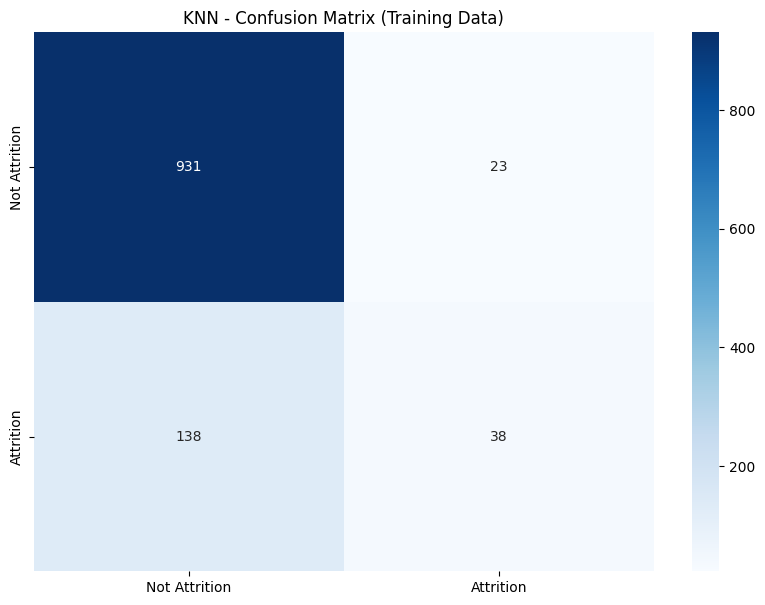

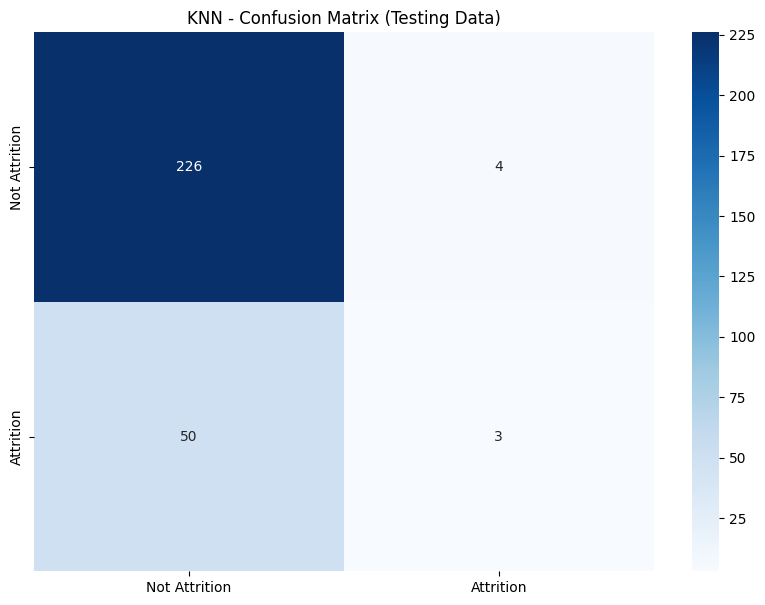

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Model: K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()

# Train the model
knn_model.fit(X_train, y_train)

# Predictions on training and test data
y_train_pred_knn = knn_model.predict(X_train)
y_test_pred_knn = knn_model.predict(X_test)

# Accuracy
train_accuracy_knn = accuracy_score(y_train, y_train_pred_knn)
test_accuracy_knn = accuracy_score(y_test, y_test_pred_knn)

print(f"KNN - Training Accuracy: {train_accuracy_knn * 100:.2f}%")
print(f"KNN - Testing Accuracy: {test_accuracy_knn * 100:.2f}%")

# Confusion Matrices
conf_matrix_train_knn = confusion_matrix(y_train, y_train_pred_knn)
conf_matrix_test_knn = confusion_matrix(y_test, y_test_pred_knn)

# Display confusion matrices
print("Confusion Matrix (Training):\n", conf_matrix_train_knn)
print("Confusion Matrix (Testing):\n", conf_matrix_test_knn)

# Visualize Confusion Matrix for Training Data
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_train_knn, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Attrition", "Attrition"], yticklabels=["Not Attrition", "Attrition"])
plt.title("KNN - Confusion Matrix (Training Data)")
plt.show()

# Visualize Confusion Matrix for Testing Data
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_test_knn, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Attrition", "Attrition"], yticklabels=["Not Attrition", "Attrition"])
plt.title("KNN - Confusion Matrix (Testing Data)")
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7635 - loss: 13.9603 - val_accuracy: 0.8127 - val_loss: 0.6563
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8439 - loss: 0.6590 - val_accuracy: 0.8127 - val_loss: 0.6587
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8427 - loss: 0.6542 - val_accuracy: 0.8127 - val_loss: 0.6412
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8374 - loss: 0.6558 - val_accuracy: 0.8127 - val_loss: 0.6514
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8472 - loss: 0.6438 - val_accuracy: 0.8127 - val_loss: 0.6417
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8509 - loss: 0.6323 - val_accuracy: 0.8127 - val_loss: 0.6325
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8377 - loss: 0.6247 - val_accuracy: 0.8127 - val_loss: 0.6238
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8607 - loss: 0.6095 - val_accuracy: 0.8127 - val_loss

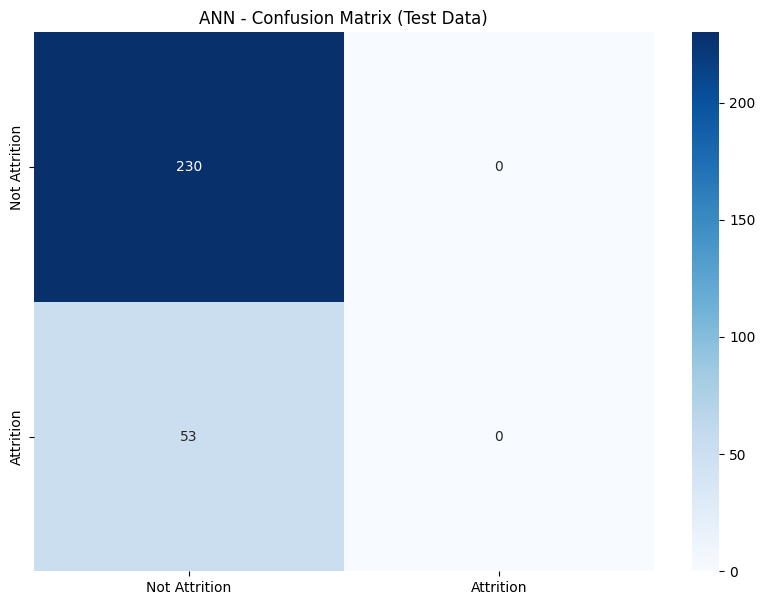

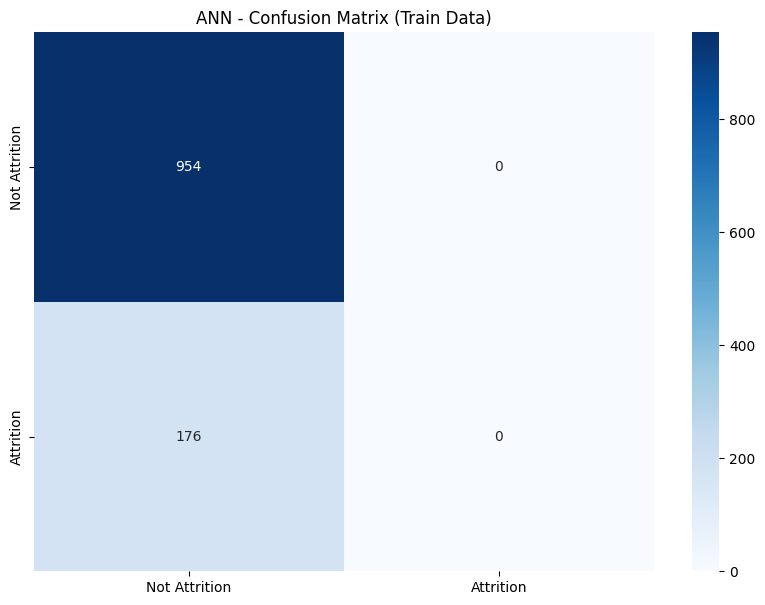

In [ ]:
# Importing necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is the DataFrame and 'Attrition' is the target variable
X = data.drop('Attrition', axis=1)  # Features (independent variables)
y = data['Attrition']               # Target variable (dependent)

# Split the dataset into training and testing sets (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the ANN Model
model = Sequential()

# Input Layer (with input_dim as the number of features)
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

# Hidden Layers
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))

# Output Layer
model.add(Dense(units=1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test data
y_pred_ann = (model.predict(X_test) > 0.5).astype(int)  # Convert probabilities to 0 or 1

# Accuracy
test_accuracy_ann = accuracy_score(y_test, y_pred_ann)
train_accuracy_ann = accuracy_score(y_train, (model.predict(X_train) > 0.5).astype(int))

print(f"ANN - Training Accuracy: {train_accuracy_ann * 100:.2f}%")
print(f"ANN - Testing Accuracy: {test_accuracy_ann * 100:.2f}%")

# Confusion Matrix for Test Data
conf_matrix_test_ann = confusion_matrix(y_test, y_pred_ann)
conf_matrix_train_ann = confusion_matrix(y_train, (model.predict(X_train) > 0.5).astype(int))

# Display confusion matrices
print("Confusion Matrix (Test):\n", conf_matrix_test_ann)
print("Confusion Matrix (Train):\n", conf_matrix_train_ann)

# Visualize Confusion Matrix for Testing Data
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_test_ann, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Attrition", "Attrition"], yticklabels=["Not Attrition", "Attrition"])
plt.title("ANN - Confusion Matrix (Test Data)")
plt.show()

# Visualize Confusion Matrix for Training Data
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_train_ann, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Attrition", "Attrition"], yticklabels=["Not Attrition", "Attrition"])
plt.title("ANN - Confusion Matrix (Train Data)")
plt.show()


In [ ]:
results = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN', 'ANN'],
    'Training Accuracy': [
        train_accuracy * 100,  # Changed to 'train_accuracy'
        train_accuracy_dt * 100,
        train_accuracy_rf * 100,
        train_accuracy_svm * 100,
        train_accuracy_knn * 100,
        train_accuracy_ann * 100
    ],
    'Testing Accuracy': [
        test_accuracy * 100, # Changed to 'test_accuracy'
        test_accuracy_dt * 100,
        test_accuracy_rf * 100,
        test_accuracy_svm * 100,
        test_accuracy_knn * 100,
        test_accuracy_ann * 100
    ]
}
# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results)

# Display the results as a table
print(results_df)

                 Model  Training Accuracy  Testing Accuracy
0  Logistic Regression          84.513274         81.625442
1        Decision Tree         100.000000         74.911661
2        Random Forest         100.000000         84.452297
3                  SVM          84.424779         81.272085
4                  KNN          85.752212         80.918728
5                  ANN          84.424779         81.272085


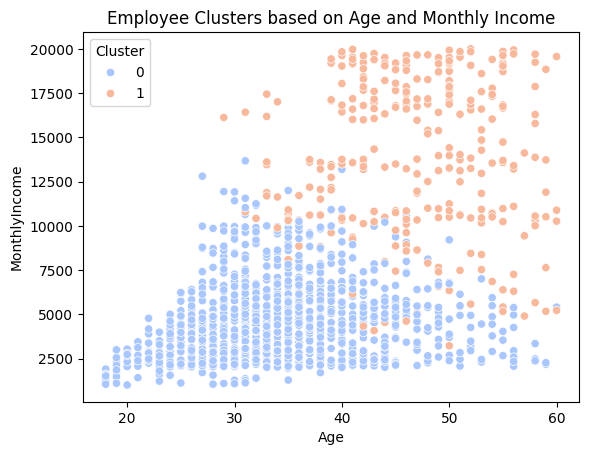

In [ ]:
# K-Means Clustering for Employee Segmentation
# Selecting features for clustering (you can select features as per your analysis)
features_for_clustering = X[['Age', 'DailyRate', 'DistanceFromHome', 'MonthlyIncome', 'YearsAtCompany', 'JobSatisfaction', 'WorkLifeBalance']]

# Normalize features for clustering
features_scaled = scaler.fit_transform(features_for_clustering)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Add cluster labels to the data
data['Cluster'] = clusters

# Visualizing clusters
sns.scatterplot(x=data['Age'], y=data['MonthlyIncome'], hue=data['Cluster'], palette='coolwarm')
plt.title("Employee Clusters based on Age and Monthly Income")
plt.show()


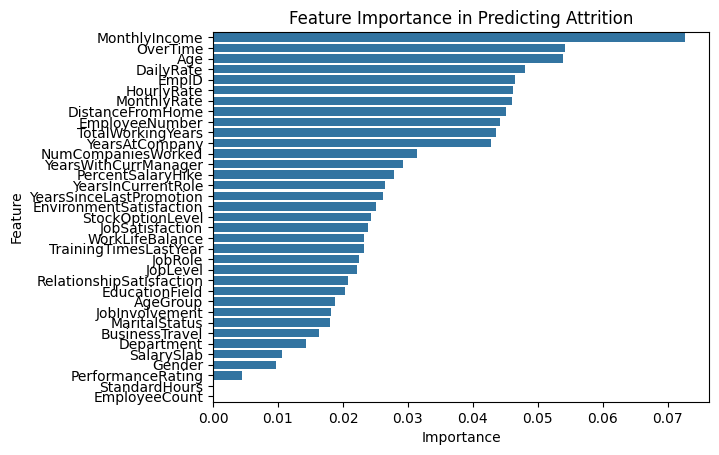

In [ ]:
# Optional: Feature Importance
feature_importances = rf_model.feature_importances_
feat_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feat_importance_df = feat_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
sns.barplot(x='Importance', y='Feature', data=feat_importance_df)
plt.title("Feature Importance in Predicting Attrition")
plt.show()

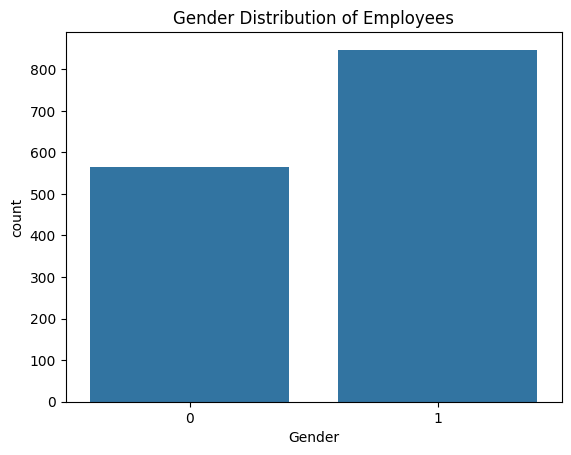

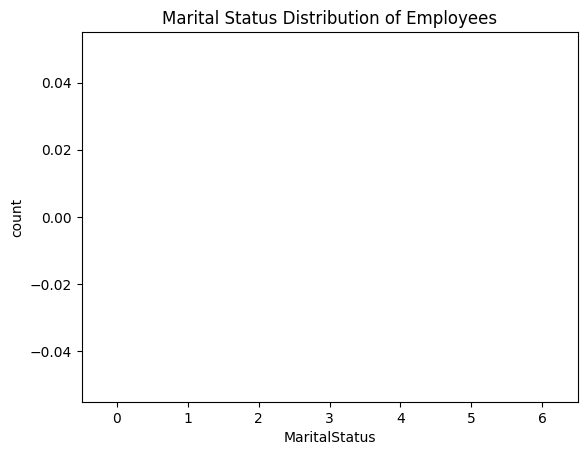

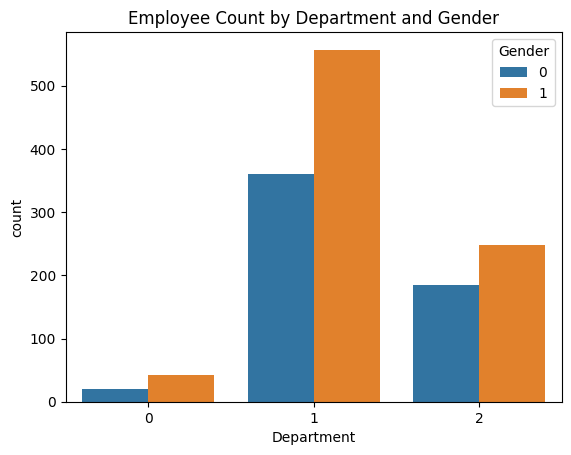

In [ ]:
# Demographics Breakdown
demographics = data[['Age', 'Gender', 'MaritalStatus', 'Department', 'EducationField']].copy()

# Gender Distribution
sns.countplot(data=demographics, x='Gender')
plt.title('Gender Distribution of Employees')
plt.show()

# Map MaritalStatus to Numeric
marital_status_mapping = {'Single': 0, 'Married': 1, 'Divorced': 2}
demographics['MaritalStatus'] = demographics['MaritalStatus'].map(marital_status_mapping)
# Marital Status Distribution (Now Numeric)
sns.countplot(data=demographics, x='MaritalStatus')
plt.title('Marital Status Distribution of Employees')
plt.show()

# Department-wise Count of Employees
sns.countplot(data=demographics, x='Department', hue='Gender')
plt.title('Employee Count by Department and Gender')
plt.show()


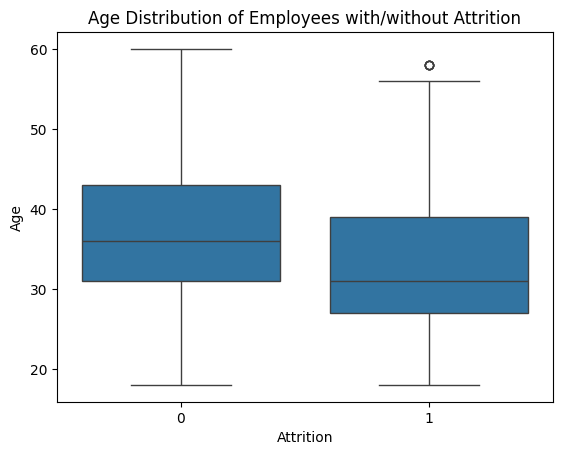

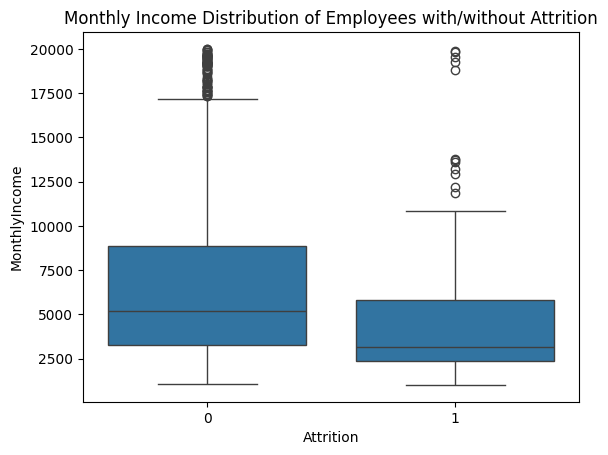

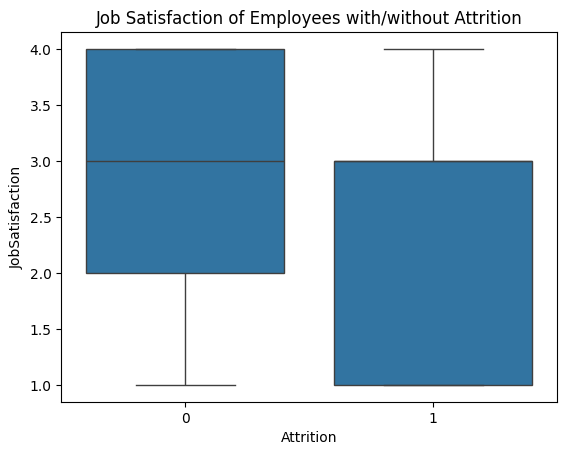

In [ ]:
# Attrition vs Age
sns.boxplot(x='Attrition', y='Age', data=data)
plt.title('Age Distribution of Employees with/without Attrition')
plt.show()

# Attrition vs Monthly Income
sns.boxplot(x='Attrition', y='MonthlyIncome', data=data)
plt.title('Monthly Income Distribution of Employees with/without Attrition')
plt.show()

# Attrition vs Job Satisfaction
sns.boxplot(x='Attrition', y='JobSatisfaction', data=data)
plt.title('Job Satisfaction of Employees with/without Attrition')
plt.show()

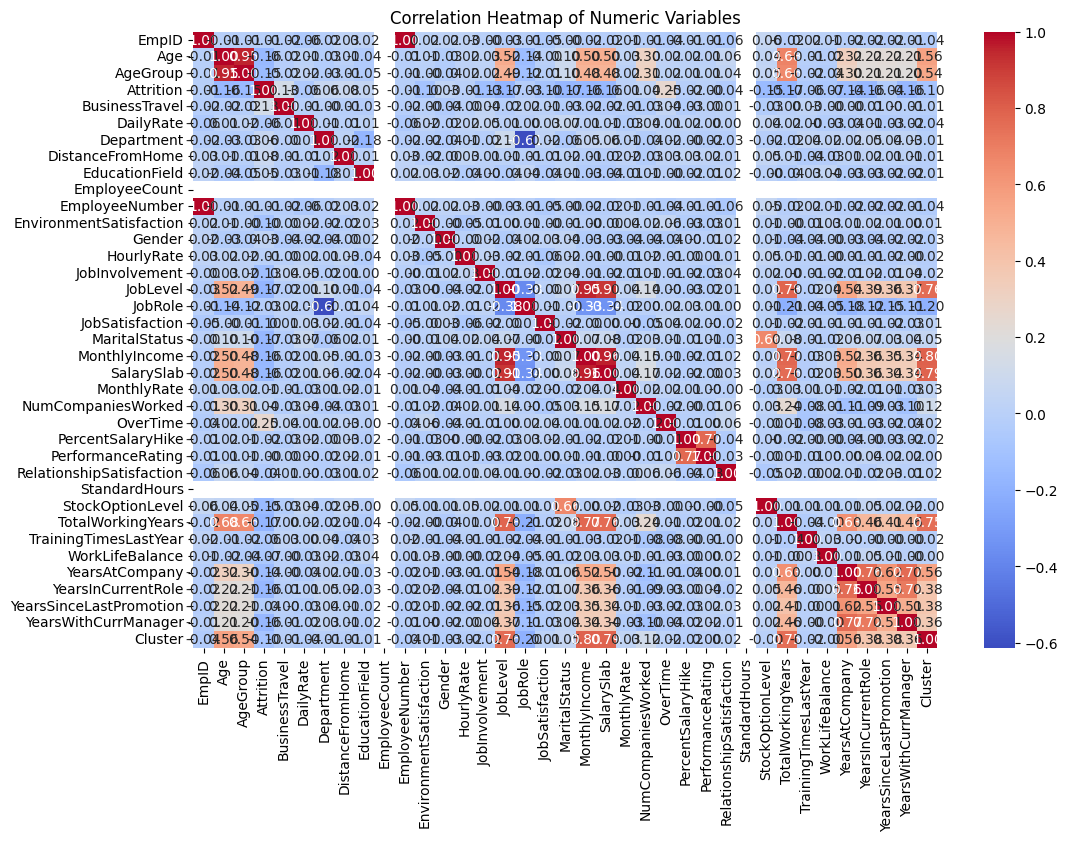

In [ ]:
# Correlation Matrix
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()


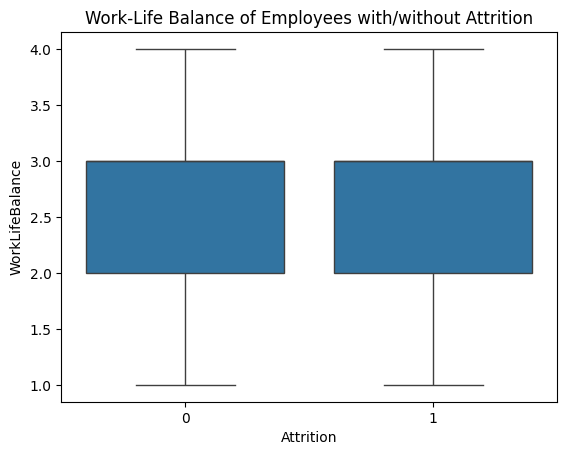

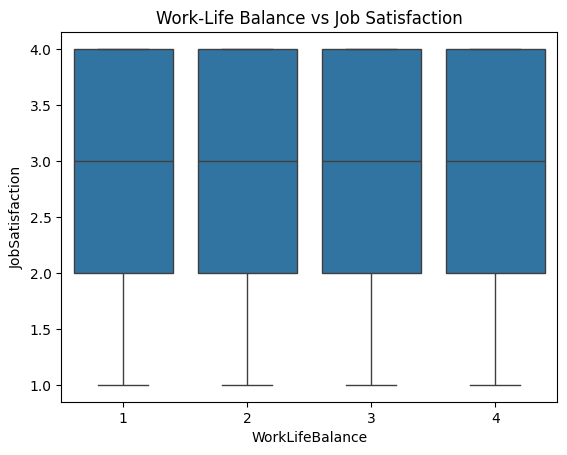

In [ ]:
# Work-Life Balance vs Attrition
sns.boxplot(x='Attrition', y='WorkLifeBalance', data=data)
plt.title('Work-Life Balance of Employees with/without Attrition')
plt.show()

# Work-Life Balance vs Job Satisfaction
sns.boxplot(x='WorkLifeBalance', y='JobSatisfaction', data=data)
plt.title('Work-Life Balance vs Job Satisfaction')
plt.show()


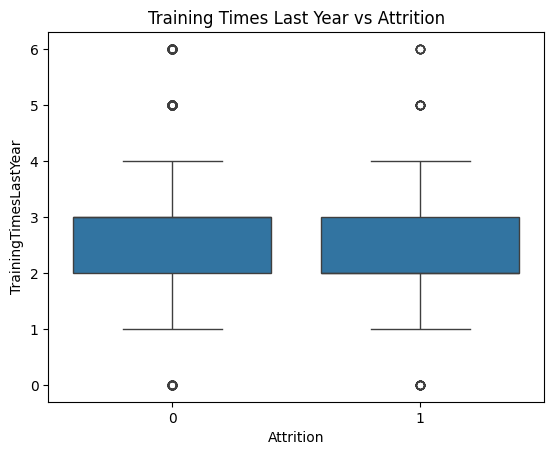

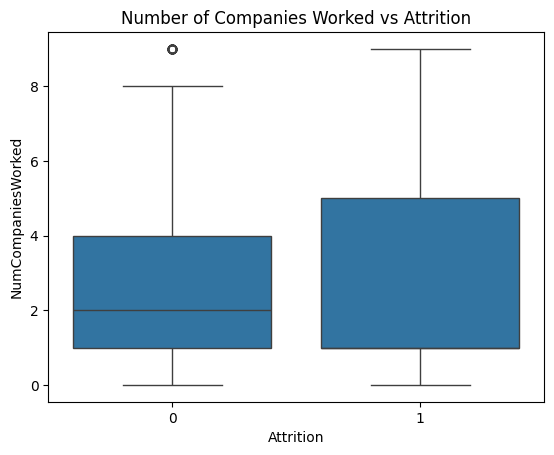

In [ ]:
# Training Time vs Attrition
sns.boxplot(x='Attrition', y='TrainingTimesLastYear', data=data)
plt.title('Training Times Last Year vs Attrition')
plt.show()

# Employee Attrition vs Number of Companies Worked
sns.boxplot(x='Attrition', y='NumCompaniesWorked', data=data)
plt.title('Number of Companies Worked vs Attrition')
plt.show()


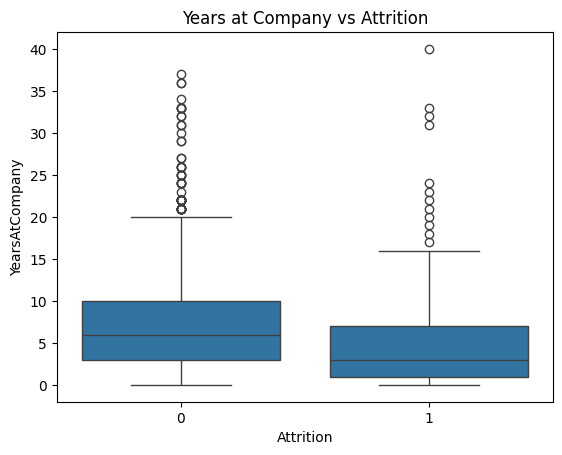

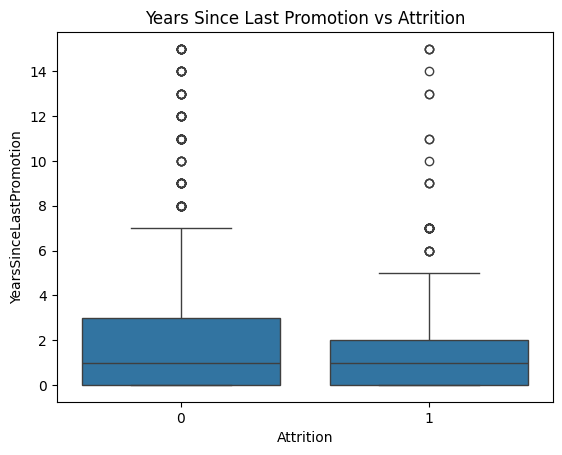

In [ ]:
# Years at Company vs Attrition
sns.boxplot(x='Attrition', y='YearsAtCompany', data=data)
plt.title('Years at Company vs Attrition')
plt.show()

# Years Since Last Promotion vs Attrition
sns.boxplot(x='Attrition', y='YearsSinceLastPromotion', data=data)
plt.title('Years Since Last Promotion vs Attrition')
plt.show()


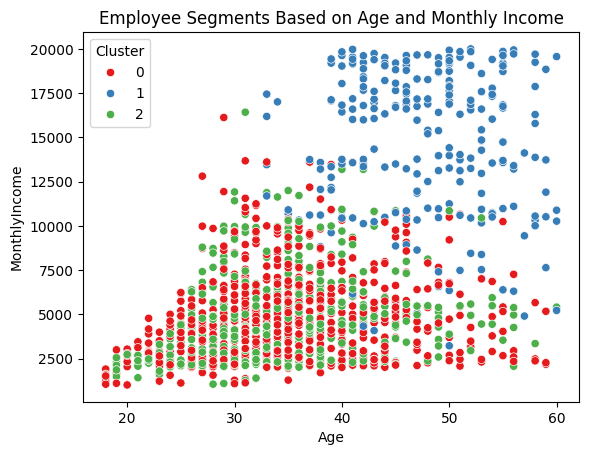

In [ ]:
# Select relevant features for clustering
clustering_features = data[['Age', 'MonthlyIncome', 'JobSatisfaction', 'WorkLifeBalance', 'YearsAtCompany']]

# Normalize the features
scaler = StandardScaler()
clustering_features_scaled = scaler.fit_transform(clustering_features)

# Apply KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(clustering_features_scaled)

# Visualizing clusters
sns.scatterplot(x=data['Age'], y=data['MonthlyIncome'], hue=data['Cluster'], palette='Set1')
plt.title('Employee Segments Based on Age and Monthly Income')
plt.show()


Accuracy: 0.8692579505300353
Confusion Matrix:
 [[220  10]
 [ 27  26]]


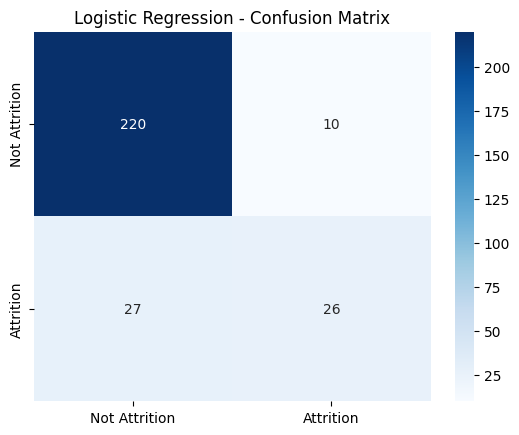

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Model: Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Predictions
y_pred_log_reg = log_reg.predict(X_test)

# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))

# Visualize Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Attrition", "Attrition"], yticklabels=["Not Attrition", "Attrition"])
plt.title("Logistic Regression - Confusion Matrix")
plt.show()


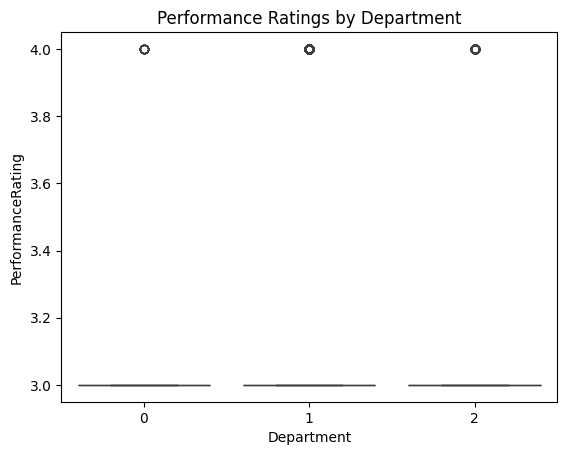

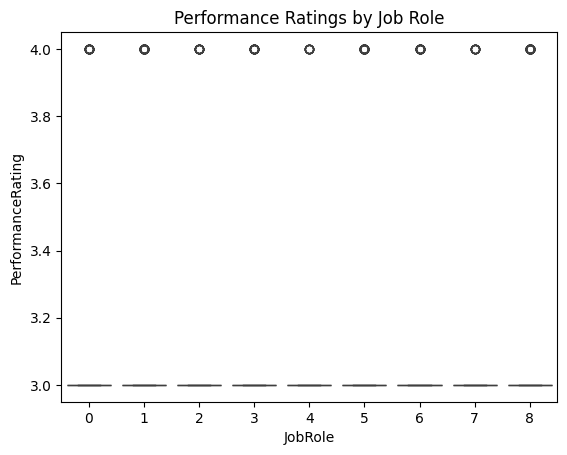

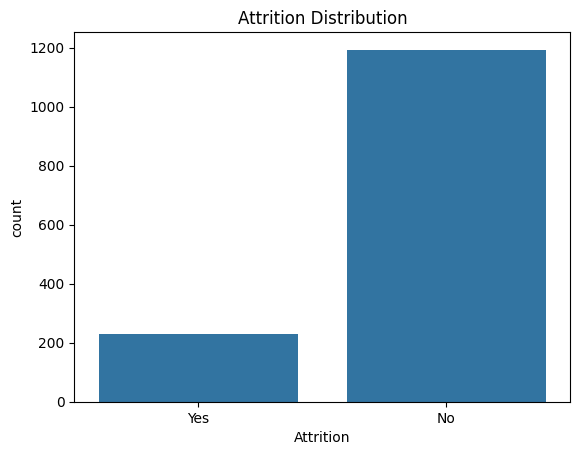

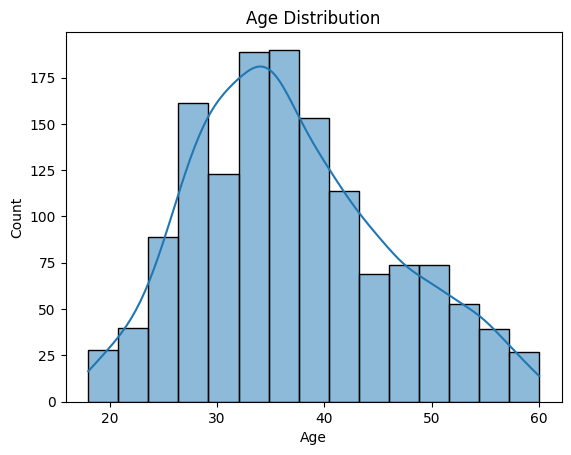

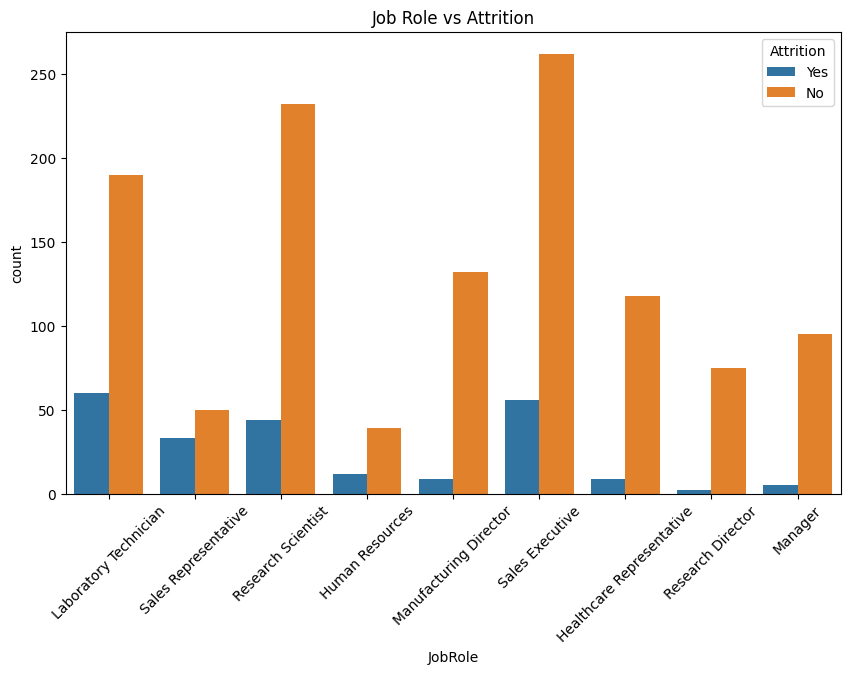

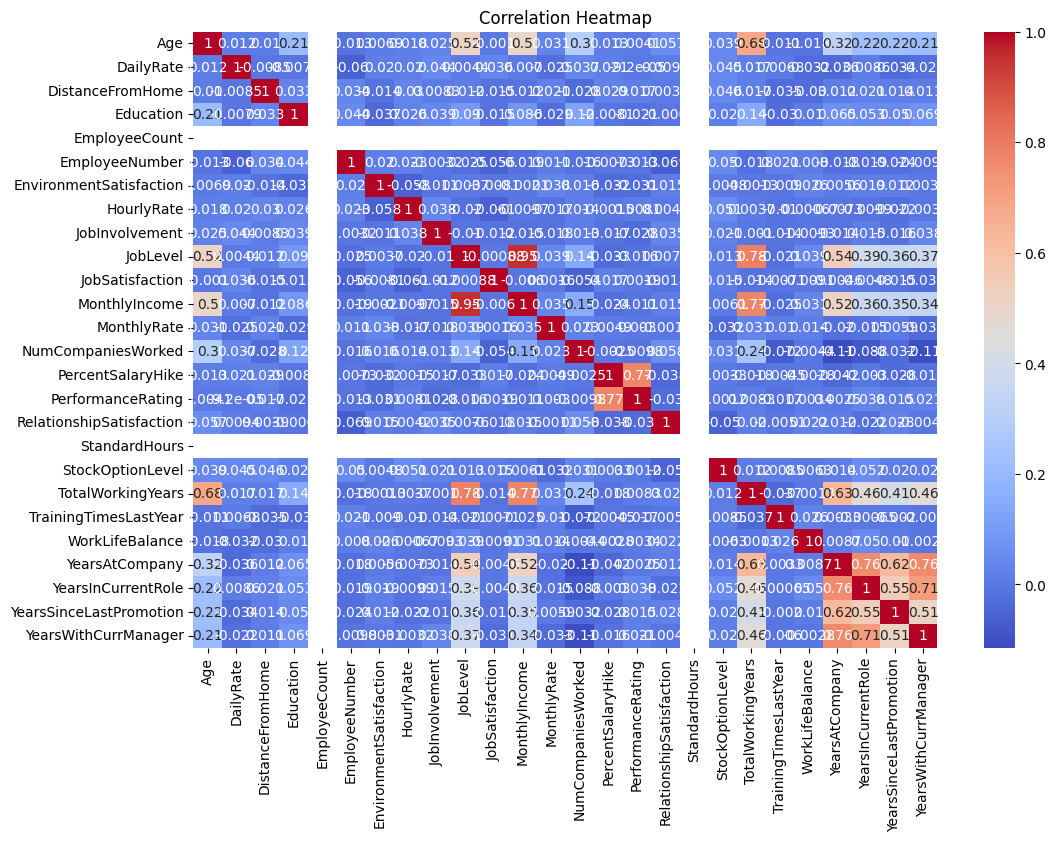

In [ ]:
# Attrition Distribution
sns.countplot(x='Attrition', data=data)
plt.title("Attrition Distribution")
plt.show()

# Age Distribution
sns.histplot(data['Age'], kde=True, bins=15)
plt.title("Age Distribution")
plt.show()

# Relationship between JobRole and Attrition
plt.figure(figsize=(10, 6))
sns.countplot(x='JobRole', hue='Attrition', data=data)
plt.title("Job Role vs Attrition")
plt.xticks(rotation=45)
plt.show()

# Select only numerical features for correlation analysis
numerical_data = data.select_dtypes(include=np.number)

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

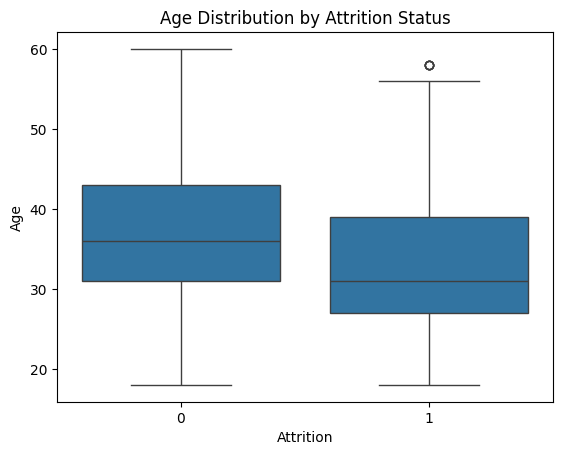

In [ ]:
# Age vs Attrition (Boxplot)
sns.boxplot(data=data, x='Attrition', y='Age')
plt.title('Age Distribution by Attrition Status')
plt.xlabel('Attrition')
plt.ylabel('Age')
plt.show()


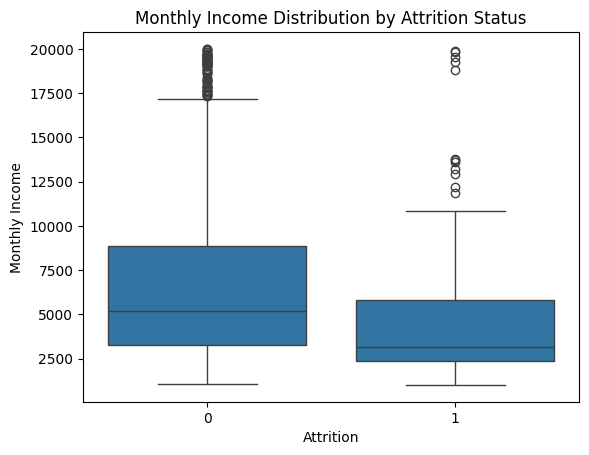

In [ ]:
# Monthly Income vs Attrition (Boxplot)
sns.boxplot(data=data, x='Attrition', y='MonthlyIncome')
plt.title('Monthly Income Distribution by Attrition Status')
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')
plt.show()


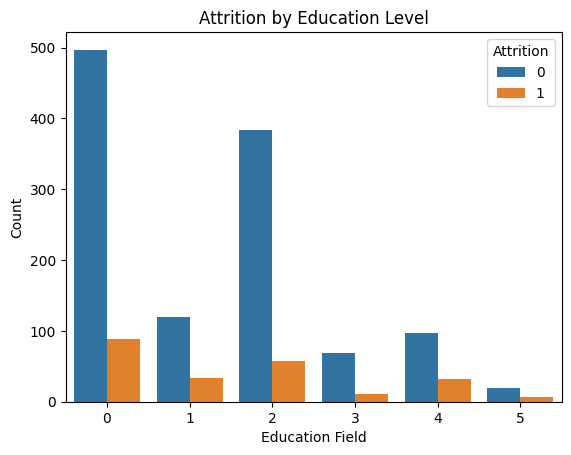

In [ ]:
# Attrition by Education Level
sns.countplot(data=data, x='EducationField', hue='Attrition')
plt.title('Attrition by Education Level')
plt.xlabel('Education Field')
plt.ylabel('Count')
plt.show()


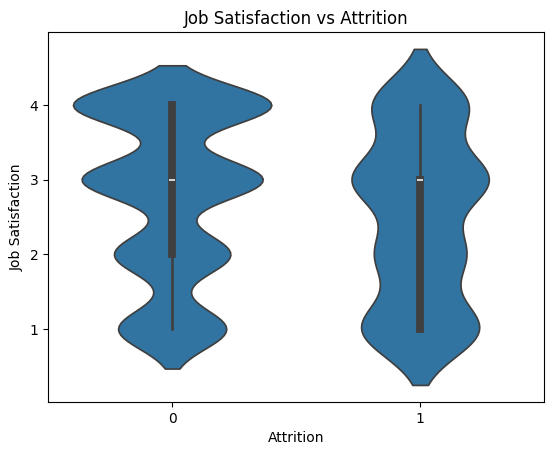

In [ ]:
# Job Satisfaction vs Attrition (Violin Plot)
sns.violinplot(data=data, x='Attrition', y='JobSatisfaction')
plt.title('Job Satisfaction vs Attrition')
plt.xlabel('Attrition')
plt.ylabel('Job Satisfaction')
plt.show()


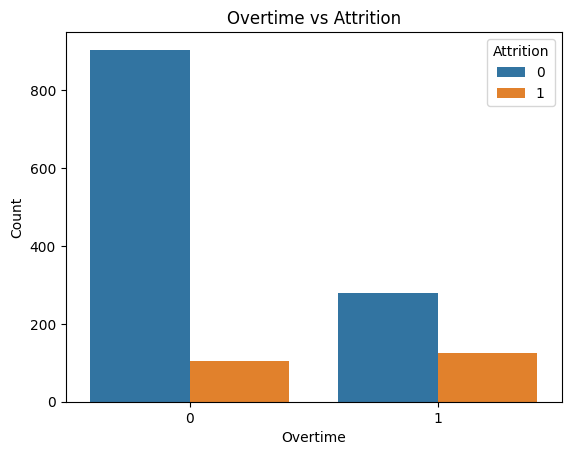

In [ ]:
# Overtime vs Attrition (Count Plot)
sns.countplot(data=data, x='OverTime', hue='Attrition')
plt.title('Overtime vs Attrition')
plt.xlabel('Overtime')
plt.ylabel('Count')
plt.show()


<ipython-input-58-df1b09c0d5fd>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


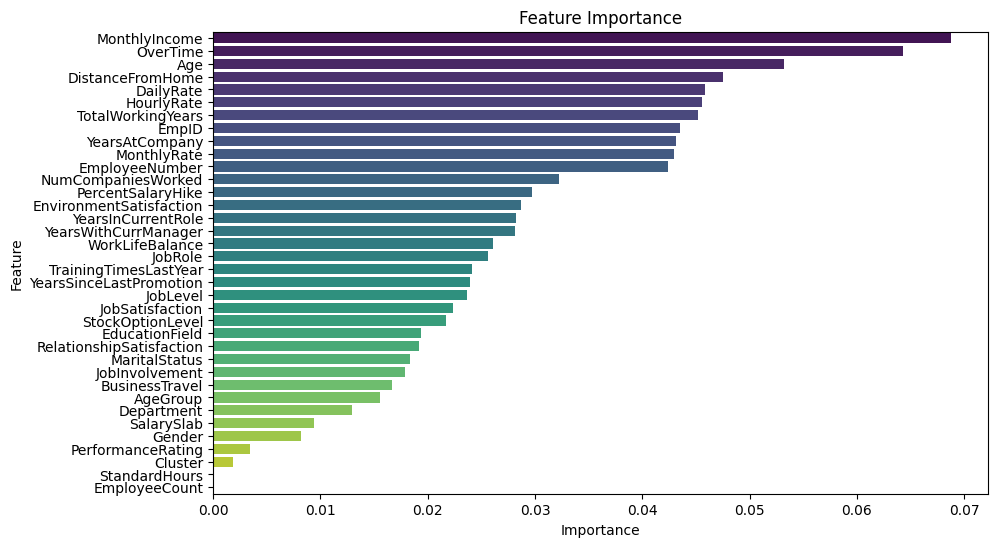

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Feature Importance
importance = rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance')
plt.show()


<ipython-input-60-002f5523dfd5>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_by_age = data.groupby('AgeGroup')['Attrition'].mean()


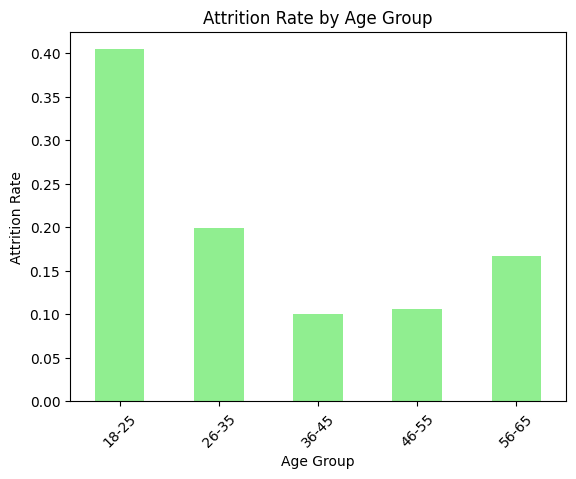

In [ ]:
# Creating age groups
age_bins = [18, 25, 35, 45, 55, 65]
age_labels = ['18-25', '26-35', '36-45', '46-55', '56-65']
data['AgeGroup'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)

# Attrition rate by age group
attrition_by_age = data.groupby('AgeGroup')['Attrition'].mean()
attrition_by_age.plot(kind='bar', color='lightgreen')
plt.title('Attrition Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Attrition Rate')
plt.xticks(rotation=45)
plt.show()


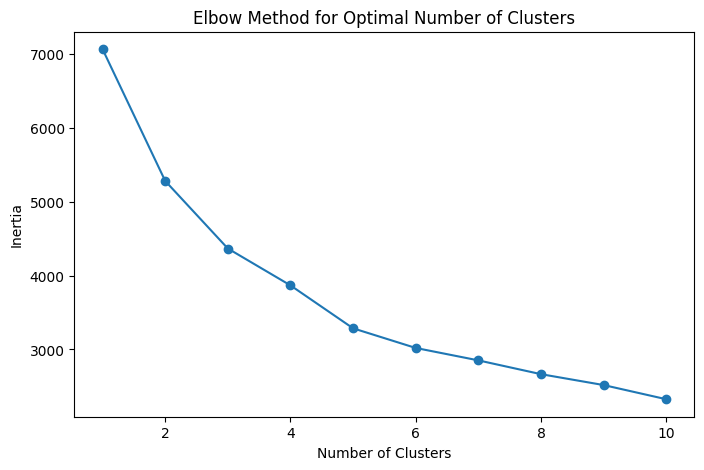

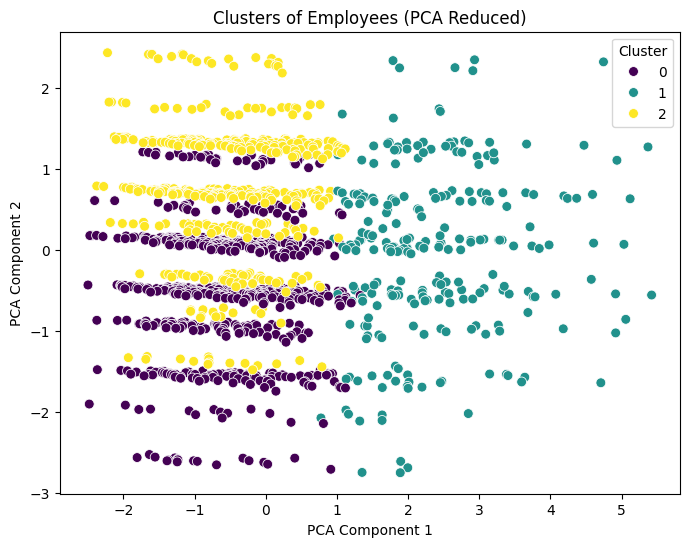

               Age  MonthlyIncome  YearsAtCompany  JobSatisfaction  \
Cluster                                                              
0        34.725490    4771.717087        5.508403         3.518207   
1        47.571429   14587.976190       14.476190         2.694444   
2        34.456376    4762.671141        5.297539         1.487696   

         WorkLifeBalance  
Cluster                   
0               2.770308  
1               2.738095  
2               2.762864  


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Select features for clustering
features = ['Age', 'MonthlyIncome', 'YearsAtCompany', 'JobSatisfaction', 'WorkLifeBalance']
clustering_data = data[features]

# Step 2: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

# Step 3: Determine optimal number of clusters using Elbow Method
inertia = []
range_clusters = range(1, 11)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Step 4: Perform K-Means Clustering with optimal clusters (assume k=3 for example)
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Step 5: Visualize Clusters (PCA for dimensionality reduction)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)
data['PCA1'] = reduced_data[:, 0]
data['PCA2'] = reduced_data[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=50)
plt.title('Clusters of Employees (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

# Step 6: Analyze Clusters
cluster_summary = data.groupby('Cluster')[features].mean()
print(cluster_summary)


   Cluster                                 ClusterName
0        0      Young, Satisfied, and Stable Employees
1        0      Young, Satisfied, and Stable Employees
2        2  Young, Dissatisfied, and At-Risk Employees
3        0      Young, Satisfied, and Stable Employees
4        0      Young, Satisfied, and Stable Employees


<ipython-input-62-3d6c79988e77>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='ClusterName', palette='viridis')


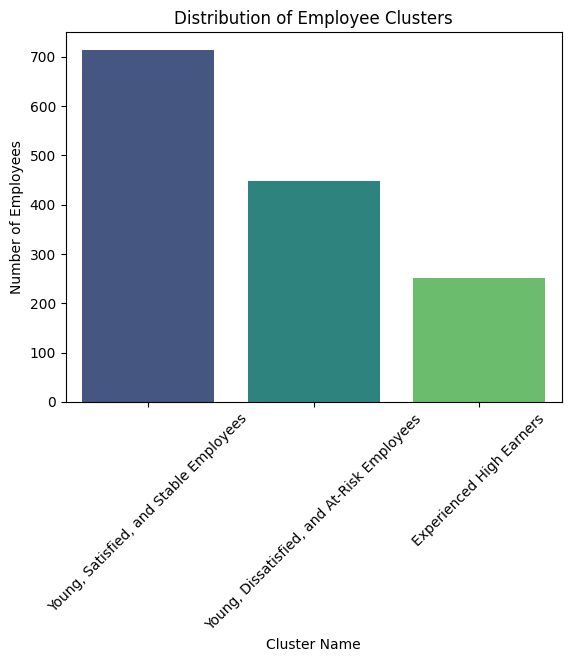

In [ ]:
# Define the cluster mapping
cluster_names = {
    0: "Young, Satisfied, and Stable Employees",
    1: "Experienced High Earners",
    2: "Young, Dissatisfied, and At-Risk Employees"
}

# Map the cluster labels to their names
data['ClusterName'] = data['Cluster'].map(cluster_names)

# Display the first few rows to verify the new cluster names
print(data[['Cluster', 'ClusterName']].head())

# Example Visualization: Distribution of Clusters
sns.countplot(data=data, x='ClusterName', palette='viridis')
plt.title('Distribution of Employee Clusters')
plt.xlabel('Cluster Name')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.show()


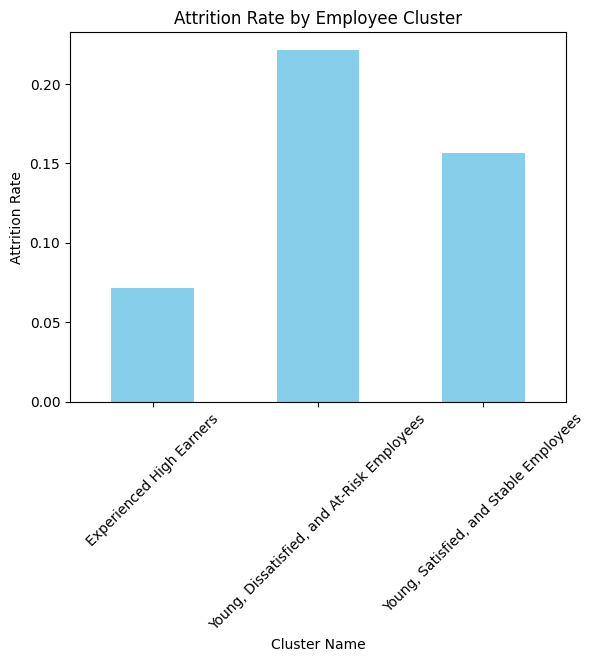

In [ ]:
# Assuming Attrition is already in the dataset
cluster_attrition_rate = data.groupby('ClusterName')['Attrition'].mean()

# Plot
cluster_attrition_rate.plot(kind='bar', color='skyblue')
plt.title('Attrition Rate by Employee Cluster')
plt.xlabel('Cluster Name')
plt.ylabel('Attrition Rate')
plt.xticks(rotation=45)
plt.show()


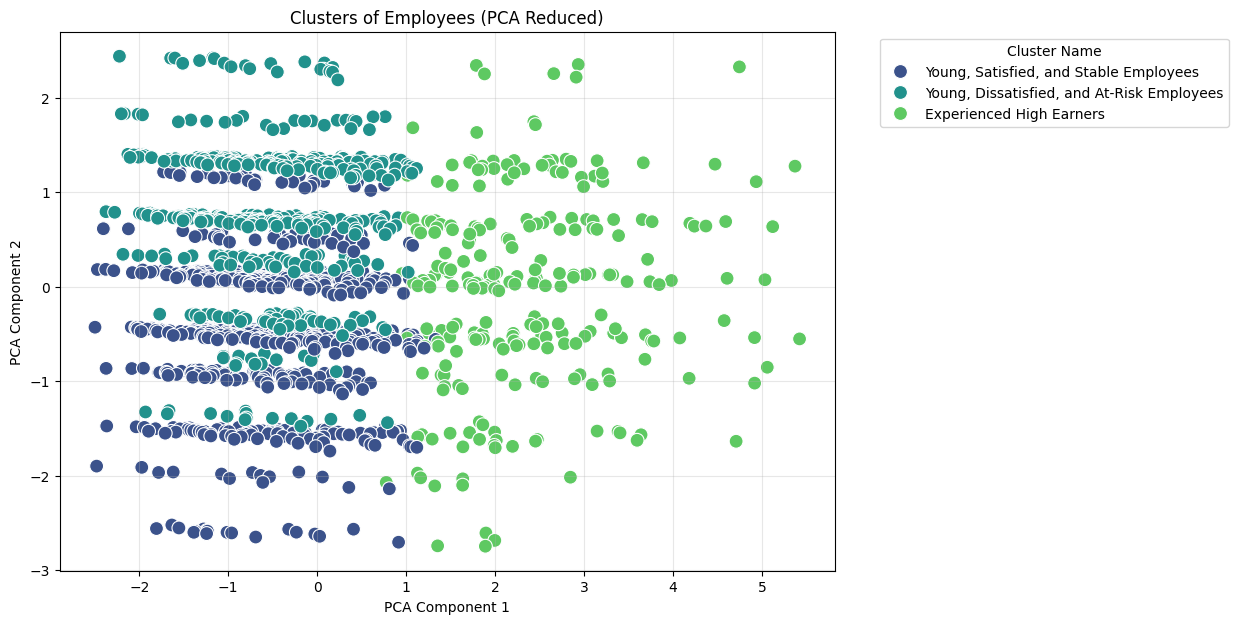

In [ ]:
# PCA Plot with Cluster Names
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=data,
    x='PCA1',
    y='PCA2',
    hue='ClusterName',  # Use descriptive cluster names
    palette='viridis',
    s=100
)
plt.title('Clusters of Employees (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()


<ipython-input-65-0fc15ce17d42>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Attrition', y='WorkLifeBalance', palette='Set2')


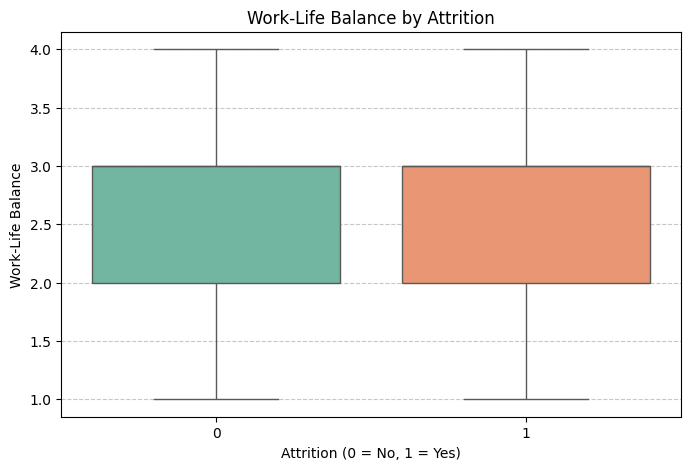

In [ ]:
# Box Plot for Work-Life Balance by Attrition
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x='Attrition', y='WorkLifeBalance', palette='Set2')
plt.title('Work-Life Balance by Attrition')
plt.xlabel('Attrition (0 = No, 1 = Yes)')
plt.ylabel('Work-Life Balance')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


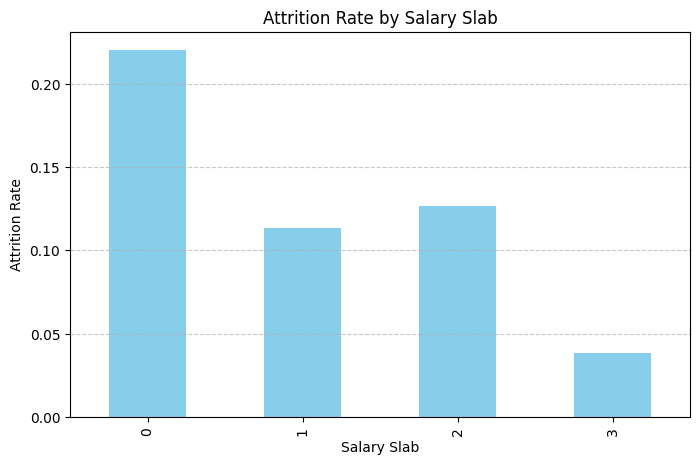

In [ ]:
# Attrition Rate by Salary Slab
salary_attrition = data.groupby('SalarySlab')['Attrition'].mean()

# Plot
plt.figure(figsize=(8, 5))
salary_attrition.plot(kind='bar', color='skyblue')
plt.title('Attrition Rate by Salary Slab')
plt.xlabel('Salary Slab')
plt.ylabel('Attrition Rate')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


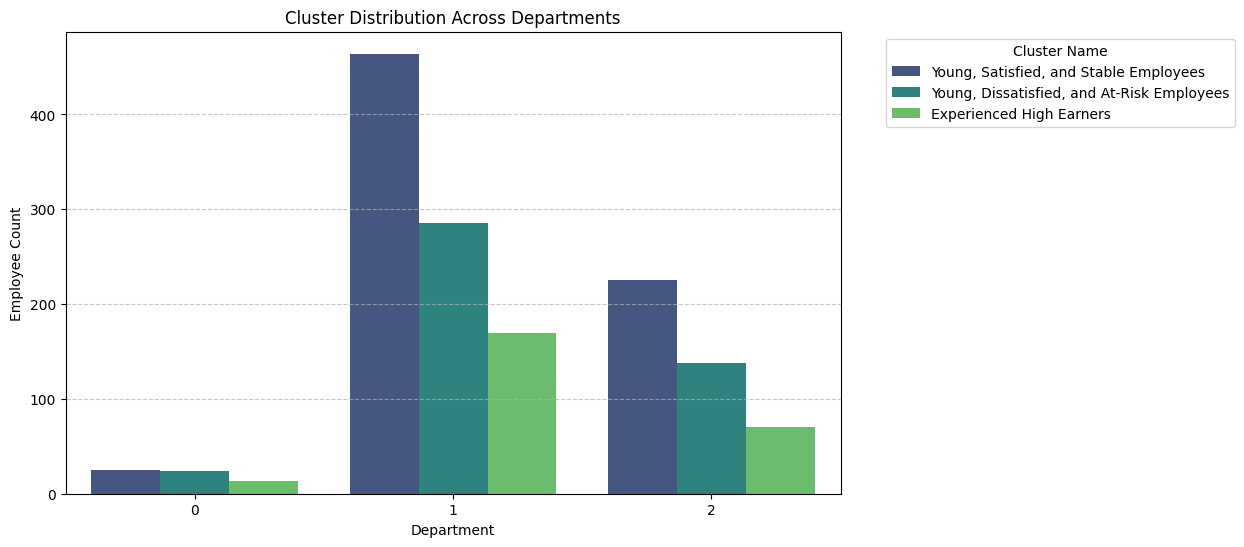

In [ ]:
# Cluster Distribution Across Departments
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Department', hue='ClusterName', palette='viridis')
plt.title('Cluster Distribution Across Departments')
plt.xlabel('Department')
plt.ylabel('Employee Count')
plt.xticks(rotation=0)
plt.legend(title='Cluster Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


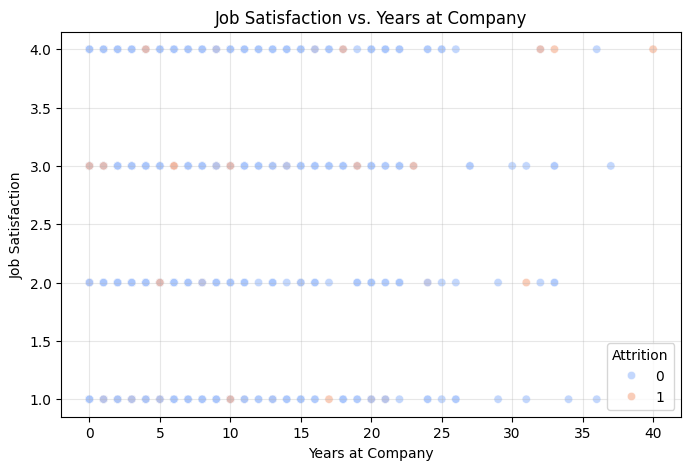

In [ ]:
# Scatter Plot: Job Satisfaction vs. Years at Company
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='YearsAtCompany', y='JobSatisfaction', hue='Attrition', palette='coolwarm', alpha=0.7)
plt.title('Job Satisfaction vs. Years at Company')
plt.xlabel('Years at Company')
plt.ylabel('Job Satisfaction')
plt.grid(alpha=0.3)
plt.show()


<ipython-input-69-24596600ce2d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='ClusterName', y='Age', palette='muted')


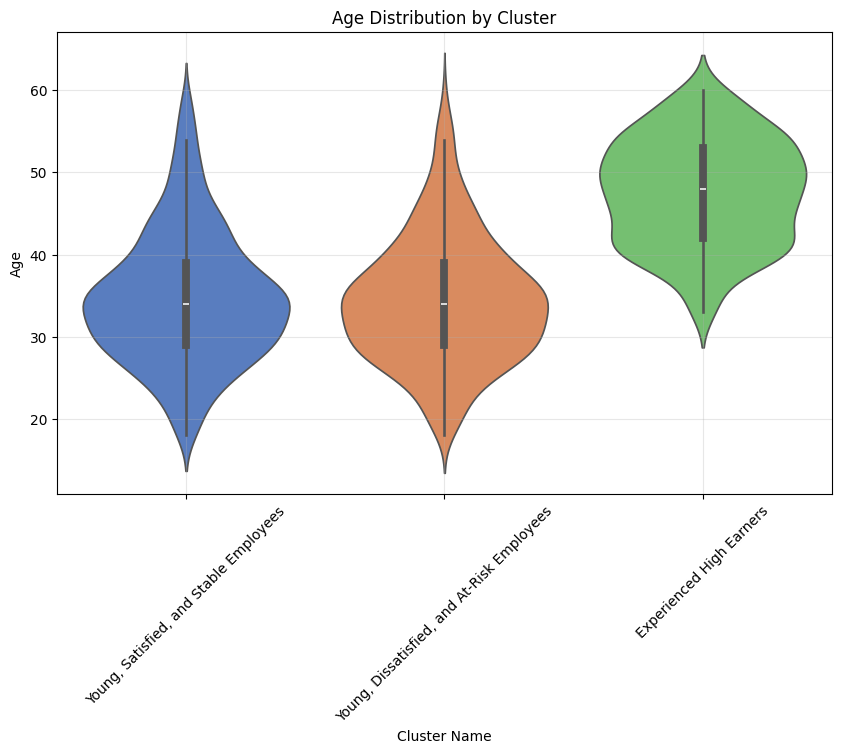

In [ ]:
# Age Distribution by Cluster
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x='ClusterName', y='Age', palette='muted')
plt.title('Age Distribution by Cluster')
plt.xlabel('Cluster Name')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.show()


<ipython-input-70-984fd4feb8a7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Attrition', y='DistanceFromHome', palette='cubehelix')


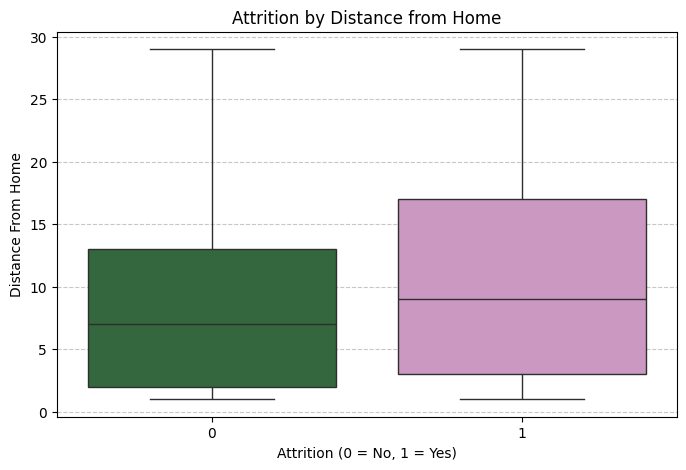

In [ ]:
# Attrition by Distance from Home
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x='Attrition', y='DistanceFromHome', palette='cubehelix')
plt.title('Attrition by Distance from Home')
plt.xlabel('Attrition (0 = No, 1 = Yes)')
plt.ylabel('Distance From Home')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<ipython-input-71-e8abe651aeb8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Attrition', y='YearsSinceLastPromotion', palette='coolwarm')


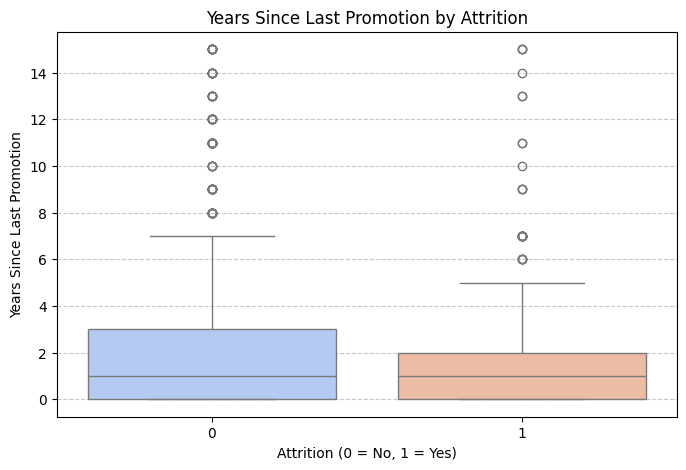

In [ ]:
# Box Plot: Years Since Last Promotion by Attrition
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x='Attrition', y='YearsSinceLastPromotion', palette='coolwarm')
plt.title('Years Since Last Promotion by Attrition')
plt.xlabel('Attrition (0 = No, 1 = Yes)')
plt.ylabel('Years Since Last Promotion')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


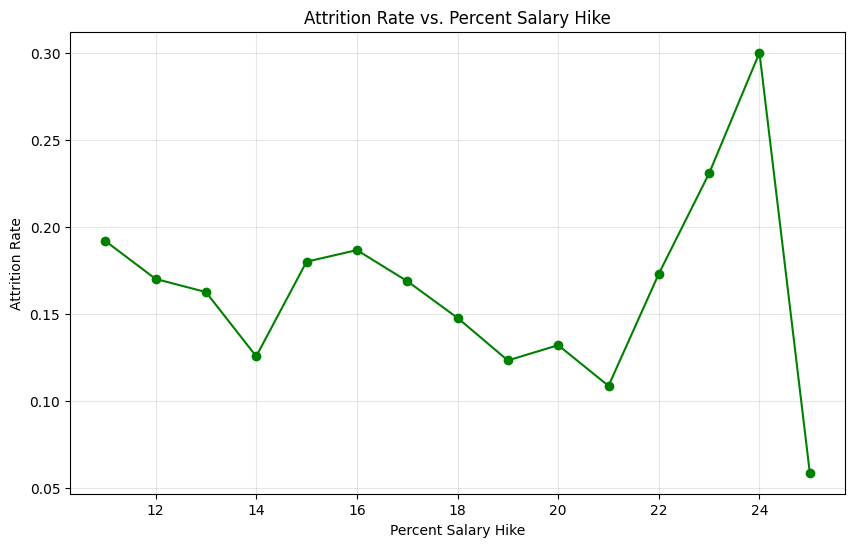

In [ ]:
# Attrition by Percent Salary Hike
salary_hike_attrition = data.groupby('PercentSalaryHike')['Attrition'].mean()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(salary_hike_attrition, marker='o', color='green')
plt.title('Attrition Rate vs. Percent Salary Hike')
plt.xlabel('Percent Salary Hike')
plt.ylabel('Attrition Rate')
plt.grid(alpha=0.3)
plt.show()


In [ ]:
# Step 4: Ensure all features are numeric
categorical_columns = X_train.select_dtypes(include='object').columns

if len(categorical_columns) > 0:
    print("Encoding the following columns:", categorical_columns)
    # Apply Label Encoding for non-numeric columns
    for col in categorical_columns:
        le = LabelEncoder()
        X_train[col] = le.fit_transform(X_train[col])
        X_test[col] = le.transform(X_test[col])
        data[col] = le.transform(data[col])
else:
    print("No categorical columns found. Skipping encoding.")

No categorical columns found. Skipping encoding.


<ipython-input-77-8745f21c5033>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['AgeGroup'] = data['AgeGroup'].replace({
<ipython-input-77-8745f21c5033>:6: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data['AgeGroup'] = data['AgeGroup'].replace({


High-Risk Employees (Likely to Leave):
   EmployeeNumber  AttritionRiskScore  JobRole  MonthlyIncome  OverTime
0             405                0.77        5           1420         0
2             614                0.90        2           1878         1
4            1156                0.73        5           1904         0
6            1624                0.89        2           1569         1
8             167                0.93        2           1675         1


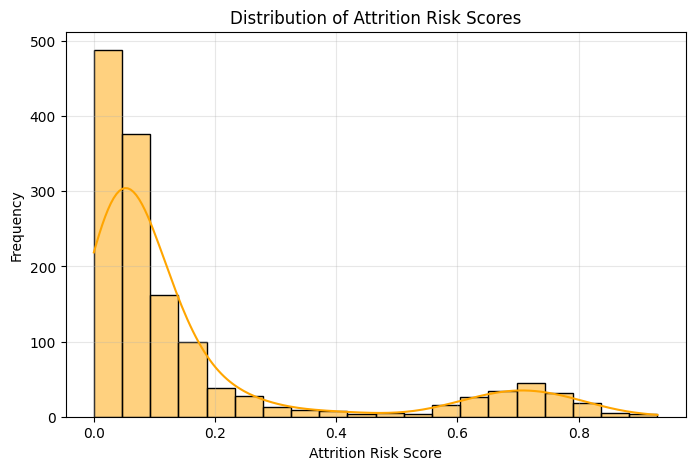

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Convert range-like strings into numeric bins if necessary
# Example for the column 'AgeGroup' with values like '18-25'
if 'AgeGroup' in data.columns:
    data['AgeGroup'] = data['AgeGroup'].replace({
        '18-25': 1,
        '26-35': 2,
        '36-45': 3,
        '46-55': 4,
        '56-65': 5
    })

# Step 2: Ensure all categorical columns are encoded
# Combine train, test, and data for consistent encoding
all_data = pd.concat([X_train, X_test, data[X_train.columns]])

# Identify non-numeric columns
categorical_columns = all_data.select_dtypes(include='object').columns

# Apply Label Encoding
for col in categorical_columns:
    le = LabelEncoder()
    all_data[col] = le.fit_transform(all_data[col])

# Split back into original datasets
X_train = all_data.iloc[:len(X_train)]
X_test = all_data.iloc[len(X_train):len(X_train) + len(X_test)]
data[X_train.columns] = all_data.iloc[len(X_train) + len(X_test):]

# Step 3: Predict Probability of Attrition
data['AttritionRiskScore'] = rf_model.predict_proba(data[X_train.columns])[:, 1]

# Step 4: Identify High-Risk Employees
high_risk_employees = data[data['AttritionRiskScore'] > 0.7]  # Threshold for high risk

# Display High-Risk Employees
print("High-Risk Employees (Likely to Leave):")
print(high_risk_employees[['EmployeeNumber', 'AttritionRiskScore', 'JobRole', 'MonthlyIncome', 'OverTime']].head())

# Step 5: Plot Distribution of Attrition Risk Scores
plt.figure(figsize=(8, 5))
sns.histplot(data['AttritionRiskScore'], bins=20, kde=True, color='orange')
plt.title('Distribution of Attrition Risk Scores')
plt.xlabel('Attrition Risk Score')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)
plt.show()


In [ ]:
# Step 4: Ensure all features are numeric
categorical_columns = X_train.select_dtypes(include='object').columns

if len(categorical_columns) > 0:
    print("Encoding the following columns:", categorical_columns)
    # Apply Label Encoding for non-numeric columns
    for col in categorical_columns:
        le = LabelEncoder()
        X_train[col] = le.fit_transform(X_train[col])
        X_test[col] = le.transform(X_test[col])
        data[col] = le.transform(data[col])
else:
    print("No categorical columns found. Skipping encoding.")


No categorical columns found. Skipping encoding.


Training Accuracy: 1.00
Testing Accuracy: 0.85
High-Risk Employees (Likely to Leave):
    EmployeeNumber  AttritionRiskScore  JobRole  MonthlyIncome  OverTime
0              405                0.81        5           1420         0
2              614                0.85        2           1878         1
6             1624                0.84        2           1569         1
8              167                0.87        2           1675         1
11             243                0.82        5           1102         0


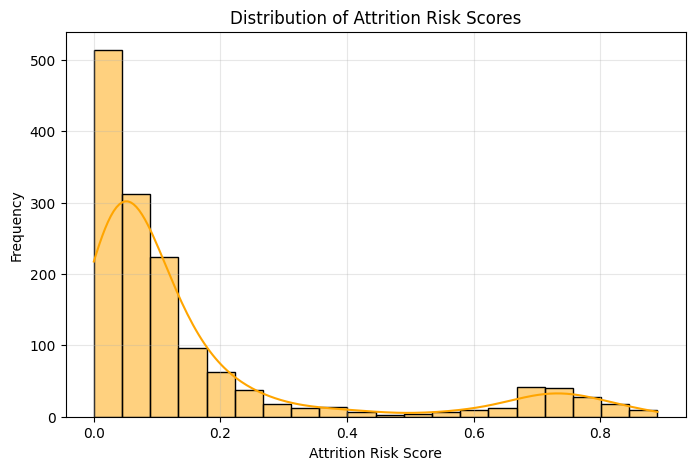

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
# Replace 'your_dataset.csv' with the actual path to your dataset
data = pd.read_excel('HR_Analytic.xlsx')

# Step 2: Define features and target
X = data.drop(columns=['Attrition'])  # Drop target and unique identifier
y = data['Attrition']

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Check and encode categorical variables
categorical_columns = X_train.select_dtypes(include='object').columns

# Apply Label Encoding
for col in categorical_columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    data[col] = le.transform(data[col])

# Step 5: Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Step 6: Evaluate the model
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

# Step 7: Predict Probability of Attrition for entire dataset
data['AttritionRiskScore'] = rf_model.predict_proba(data[X_train.columns])[:, 1]

# Step 8: Identify High-Risk Employees
high_risk_employees = data[data['AttritionRiskScore'] > 0.7]  # Threshold for high risk

# Display High-Risk Employees
print("High-Risk Employees (Likely to Leave):")
print(high_risk_employees[['EmployeeNumber', 'AttritionRiskScore', 'JobRole', 'MonthlyIncome', 'OverTime']].head())

# Step 9: Plot Distribution of Attrition Risk Scores
plt.figure(figsize=(8, 5))
sns.histplot(data['AttritionRiskScore'], bins=20, kde=True, color='orange')
plt.title('Distribution of Attrition Risk Scores')
plt.xlabel('Attrition Risk Score')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)
plt.show()


In [ ]:
# Step 1: Predict Attrition Risk Scores for all employees in the dataset
data['AttritionRiskScore'] = rf_model.predict_proba(data[X_train.columns])[:, 1]

# Step 2: Define the threshold for high-risk employees
threshold = 0.7

# Step 3: Filter the employees with risk score above the threshold
high_risk_employees = data[data['AttritionRiskScore'] > threshold]

# Step 4: Display the high-risk employees with relevant columns
print("High-Risk Employees (Likely to Leave):")
print(high_risk_employees[['EmployeeNumber', 'AttritionRiskScore', 'JobRole', 'MonthlyIncome', 'OverTime']].head())

# Optionally, save the high-risk employees to a new CSV file
high_risk_employees.to_csv('high_risk_employees.csv', index=False)


High-Risk Employees (Likely to Leave):
    EmployeeNumber  AttritionRiskScore  JobRole  MonthlyIncome  OverTime
0              405                0.81        5           1420         0
2              614                0.85        2           1878         1
6             1624                0.84        2           1569         1
8              167                0.87        2           1675         1
11             243                0.82        5           1102         0
